## load data + cleaning

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [276]:
def first_aid(df):
    temp = 'data/'+df+'.csv'
    df = pd.read_csv(temp , sep =',', names = list(range(0,30)))
    df = df[[4,0,5,1,2,3]+list(range(6,29))]
    df[5] = df[5].map(lambda x: x.lstrip('מספר תגובות -'))
    df.columns = ['url','data','number_comment','name','title']+list(range(1,25))
    return df

joy = first_aid('pain')
bowel_diseases = first_aid('bowel_diseases')
joints = first_aid('joints')
psoriasis = first_aid('psoriasis')
sclerosis = first_aid('sclerosis')

,url,data,number_comment,name,title,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
0,https://www.camoni.co.il/411804/121690,03/01/2015,21,שירה17,חולה חדשה,שלום. בתי בת ה-16 עברה התקף אחד שאושפזה בהדסה ...,XXרונן חןXX\r\nהרופא לא ידע שהיא מאושרת רק מגי...,XXערן ברקוביץXX\r\nשלום שירה\r\n\r\nבשנים האחר...,XXשירה17XX\r\nשלום רונן. הרופאה ידעה שהיא מתחת...,"XXערן ברקוביץXX\r\nמאוד מקווה שיעזור, לא רואה ...",...,"XXReneXX\r\nרונן, אני לא מסכימה איתך.\r\n\r\n2...",XXערן ברקוביץXX\r\nאני יכול להגיד שייתכן ורנה ...,XXענת40XX\r\nגם אני מטופלת ע&quot;י אובאג&#39;...,XXערן ברקוביץXX\r\nתודה ענת על השיתוף. מה דעתך...,XXמוג'וXX\r\nאני לא בטוח שאני מסכים עם רנה וער...,"XXReneXX\r\nאלי, אני חייבת לציין שאיני מגיעה מ...",XXמוג'וXX\r\nרנה - למה את חושבת שאת הרסת את הג...,XXרונן חןXX\r\nגילוי מוקדם יותר וסטרואידים היה...,NaN,NaN
1,https://www.camoni.co.il/411804/121695,03/01/2015,5,tutu1,האם שפעת חריפה יכולה לגרום להידרדרות חזקה במצב?,מיום שישי אישתי החולה יש לה שפעת חריפה עם חום ...,"XXרונן חןXX\r\nאצלי כן אבל לא תמיד, אבל זה סוב...","XXערן ברקוביץXX\r\nשלום טוטו1\r\n\r\nמחלת חום,...",XXעינת מילרXX\r\nמסכימה עם ההרגשה הזו שחום מחמ...,XXtutu1XX\r\nתודה חברים. זה אכן חוזר למצב כמעט...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.camoni.co.il/411804/121699,04/01/2015,6,debby85,מה בין ניורפתיה לבין טרשת נפוצה,<p>הבנתי שיש הבדל בין השניים שמתבטא בפגיעה במע...,XXרונן חןXX\r\nההבדל די גדול למרות שהסימפטומים...,XXdebby85XX\r\nלצערי אני לא נתקלת בניורלוגים מ...,XXרונן חןXX\r\nאני לא חושב שניתן להתבלבל... ול...,XXdebby85XX\r\nאני שואלת בגלל דברים מאוד ספיצפ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.camoni.co.il/411804/121700,04/01/2015,14,רונן חן,נוסידקסטה,התרופה לתסמונת הצחוק והבכי - מישהו קיבל ויכול ...,XXערן ברקוביץXX\r\nמקווה שאנשים ישתפו מניסיונם...,XXרונן חןXX\r\nהעלון לצרכן ממש מפחיד...,"XXרונן חןXX\r\nגם אני הייתי מעוניין לשאוב מ""חו...",XXערן ברקוביץXX\r\nזוהי תסמונת נדירה ובנוסף לכ...,...,XXReneXX\r\nמעניין ומסקרן!\r\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.camoni.co.il/411804/121717,05/01/2015,1,טנטנית,בקשת המלצה על נוירולוג בצפוןחיפה,עקב מעבר לאזור חיפה אני צריכה נוירולוג חדש\r\n...,XXעינת מילרXX\r\nהי טנטנית\r\n\r\nאני מטופלת א...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,https://www.camoni.co.il/411804/553521,23/04/2020,4,פרופ' ענת אחירון,עדכונים מפתיעים לגבי הטיפול בחולי טרשת נפוצה ל...,"<p dir=""rtl"">טרשת נפוצה היא מחלה של מערכת החיס...","XXנועםדXX\r\nמעניין, תודנ על מידה. \r\nמה לגבי...",XXasi1XX\r\nתודה על המידע המעניין :smile:,"XXאמונה, שמחה ובטחוןXX\r\nמהן התרופות מדכאות ה...",XXאפרת לXX\r\nמנ לגבי מי שלוקח פרדניזון? מאיזה...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,https://www.camoni.co.il/411804/553576,25/04/2020,2,סלסביל,חוסר ריכוז,שלום\r\nאני בת 21 חולת טרשת נפוצה משלושה שנים ...,XXעינת מילרXX\r\nהי\r\nייתכן ויש לך הפרעת קשב ...,XXערן ברקוביץXX\r\nהתשובה היא כן.\r\nטרשת נפוצ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,https://www.camoni.co.il/411804/553742,28/04/2020,12,"אמונה, שמחה ובטחון",שאלות על טקפידרה,התחלתי לפני שבועיים טיפול בטקפידרה\r\nואתמול ב...,"XXאמונה, שמחה ובטחוןXX\r\nשאלה נוספת\r\n7. לא ...","XXאמונה, שמחה ובטחוןXX\r\nמוזר שלא אמרו לי או ...",XXalex0505XX\r\nעד שהגוף יתרגל לתרופה יהיו את ...,"XXשירקיהXX\r\nקודם כל המון בהצלחה בטיפול, יהיו...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,https://www.camoni.co.il/411804/553791,29/04/2020,3,אני006,מרפאה,שלום\r\nאיך אני עובר מרפאה מאיפה שאני מטופל עכ...,XXעינת מילרXX\r\nהי\r\nאתה צריך פשוט להזמין תו...,"XXלביא שיפמןXX\r\nחשוב להדגיש, מעבר לכל מה שעי...",XXאני006XX\r\nתודה רבה,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## organize data + future engineer
### Collect names in one column

In [201]:
def isNaN(num):
    #check if isNaN
    return num != num
def extract_name(dat,i,j):
    #get a cell, and extracts the name and response
    if not isinstance(dat,str):
        print('Mistake at point'+ str(i)+' ' + str(j) + 'Does not send string')
        return ['','']
    x1 = dat.find('XX')
    x2 = dat.rfind('XX')
    if x1 or x2 <0:
        print("Can't find Name"+ str(i) + "," + str(j))
        return['','']
    name = dat[x1+2:x2]
    text = dat[x2+2:]
    if len(name) > 30:
        print("Can't extract Name"+ str(i) + "," + str(j))
        return ['','']
    return [name,text]

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
        str1 += ","
    return str1
def organize_name(df):
    #Gets DF and deletes the responses from the names and centers them in one cell
    dim = df.shape
    for i in range(0,dim[0]):
        name = [df.loc[i,'name']]
        for j in range(6,dim[1]):
            dat = df.iloc[i,j]
            if not isNaN(dat):
                save_cell = extract_name(dat,i,j)
                df.iloc[i,j] = save_cell[1]
                name.append(save_cell[0])
            else:
                break
        df.loc[i,'name'] = listToString(name)
    return df
joy = organize_name(joy)
#bowel_diseases = organize_name(bowel_diseases)
#joints = organize_name(joints)
#psoriasis = organize_name(psoriasis)
#sclerosis = organize_name(sclerosis)

joy1 = joy.copy()

Can't extract Name121,9
Can't extract Name361,11


In [139]:
# regex tests #

# def signs(text):
#     start_loc = text.find('<.>')
#     r1 = ''.join(re.split("<.+?>",text))
#     r1 = ''.join(re.split("\S+@\S+",r1))
#     print(r1)
# #     print(start_loc)
#     print(text)
#     print('\n')
#     end_loc = text.find('>')
# #     print(start_loc)
# #     print(end_loc)
#     if start_loc > -1:
#         print(text)
#         print(text[:start_loc]+text[end_loc:])
#         print('#######################')
        
# # signs(joy.loc[:100,1])
# joy.loc[:6,1].apply(lambda x: signs(x) if type(x) != float else None)
# # joy[1].apply(lambda x: signs(x) if type(x) != float else None)

לפני שנה צינור ברזל נפל ממנוף ונפגעתי בראש עם הימתומה שנוקזה בהמשך ,מאז אני סובל מכאבים שאינם נסבלים פניתי כמה פעמים למומחים כגון אורטופד שלאחרי CTהתגלה אצלי 5 בלט דיסק בצוואר ובלט בגב תחתון אך לפי האבחון זה לא הגורם לכאב פניתי לנירולוג גם שלל נירופטיה סוכרתי אומנם יש לי סכרת אך מטופל בכדור אחד של אמירל הרגל שמאל עם תחושת נימול 24 שעות ולאחרונה הנימול כבר עבר את הברך אני מרגיש את זה זרמי חשמל חזקים כאבים וחוסר שינה שמתמשך מטופל בליריקה וסימבלטה בגלל תופעות הלוואי של הליריקה שהיו עינוי שלם חוץ מהכאבים הכרוניים הסימבלטה אותו דבר והכאבים נמשכים בית החולים זורק אותי כירורג זרק אותי נירולוג זרק אותי אורטופד זרק אותי אני תקוע יש למישהוא המלצה או דרך טיפול מצבי מאוד קשה וסובל 24 שעות,תודה לכם מראש 
לפני שנה צינור ברזל נפל ממנוף ונפגעתי בראש עם הימתומה שנוקזה בהמשך ,מאז אני סובל מכאבים שאינם נסבלים פניתי כמה פעמים למומחים כגון אורטופד שלאחרי CTהתגלה אצלי 5 בלט דיסק בצוואר ובלט בגב תחתון אך לפי האבחון זה לא הגורם לכאב פניתי לנירולוג גם שלל נירופטיה סוכרתי אומנם יש לי סכרת אך מטופל בכדור אחד של 

0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: 1, dtype: object

In [273]:
# regex tests #

# print(joy.loc[191,4])

# for i in range(2,24):
# # i=2
#     jo = joy[~joy[i].isna()]
#     # jo = jo.loc[79:533]
#     # jo = joy1.loc[25:76]
#     print(i)
#     display(jo[jo[i].str.contains('400(.+?)500')][i])
#     # jo.loc[173,1]

# ''.join(re.split("\d{2}\d*-\d{7}",joy.loc[135,i]))
# print(joy.loc[53,2])


יאיר תתחיל בבדיקת b1,6,12

בדכ מחסור בהם גורם לתחושות עצביות. זה לא בדיקת דם רגילה אלא צריך לבקש מהרופא לבדוק את זה ספציפית.

שים לב שיכול להיות מצב בו זה היה בנורמה אבל עדיין נמוך-למשל הקו התחתון של הנורמה הוא 250 נראה לי והרופאים ממליצים לעמוד על 400-500-כך שתתייחס למספר ולא לעובדה אם זה נורמטיבי או לא.

אשמח לשמוע עדכון ממך!



2


53    \r\nשלום,\r\nתסמונת הפה השורף עלולה להגרם בין ...
Name: 2, dtype: object

3


Series([], Name: 3, dtype: object)

4


191    \r\nיאיר תתחיל בבדיקת b1,6,12\r\n\r\nבדכ מחסור...
Name: 4, dtype: object

5


Series([], Name: 5, dtype: object)

6


Series([], Name: 6, dtype: object)

7


53    \r\nהאם אתה נוטל תרופות נגד צרבת? אם כן אז הן ...
Name: 7, dtype: object

8


Series([], Name: 8, dtype: object)

9


Series([], Name: 9, dtype: object)

10


Series([], Name: 10, dtype: object)

11


Series([], Name: 11, dtype: object)

12


Series([], Name: 12, dtype: object)

13


Series([], Name: 13, dtype: object)

14


Series([], Name: 14, dtype: object)

15


Series([], Name: 15, dtype: object)

16


Series([], Name: 16, dtype: object)

17


Series([], Name: 17, dtype: object)

18


Series([], Name: 18, dtype: object)

19


Series([], Name: 19, dtype: object)

20


Series([], Name: 20, dtype: object)

21


Series([], Name: 21, dtype: object)

22


Series([], Name: 22, dtype: object)

23


Series([], Name: 23, dtype: object)

TypeError: expected string or bytes-like object

### clean the text

In [261]:
import itertools

# def delete_prefixes(item,prefixes_word):
#     #Deleting section. Gets two words (in list) and deletes everything in between 
#     #Example for the need can be find at joy.iloc[13,5]
#     for word in prefixes_word:
#         loc1 = item.find(word[0])
#         loc2 = item.find(word[1])
#         #print(loc1,loc2)
#         while loc1 > 0 and loc2 > 0:
#             length_w = len(word[1])
#             item = item[:loc1] + item[loc2+length_w:]
#             loc1 = item.find(word[0])
#             loc2 = item.find(word[1])
#     return item



def delete_word(item,delete_list):
    # delete words form the cell
    for word in delete_list:
        item = ''.join(re.split(word,item))
        if word in item:
            loc = item.find(word)
            while loc > -1:
                length_w = len(word)
                item = item[:loc] + item[loc+length_w:]
                loc = item.find(word)
    return item

def multi_option_delete(item,multi_option):
    #Like delete_prefixes but for multiple selection.
    prefixes_word = list(itertools.product(*multi_option))
    item = delete_prefixes(item,prefixes_word)
    return item

def regex_remove(item,list_ex):
    for reg in list_ex:
        pattern = re.compile(reg)
        item = pattern.sub('', item)
    return item

def clean_df(item):
    #get cell and list of word that not allowed to be contain in the cell
    #return the cell clean
#     prefixes_word = [['<a','a>'],['<br >','<br>'],['<div','div>']]
    delete_list = ['&nbsp;','&quot;',"&#39;"]
    list_regex = ['<.+?>','\S*@\S*\s?','http\S+',"\d{2}\d*-\d{7}"]
    #list reg  = email         , web
    
    #multi_option = [['http','https'],['co.il','com']]
    if isNaN(item):
        return item
#     item = delete_prefixes(item,prefixes_word)
    item = delete_word(item,delete_list)
    #item = multi_option_delete(item,multi_option)
    item = regex_remove(item,list_regex)
    return item





def run_over_DF(df,fun):
#Unfortunately applymap run to MemoryError: in some case. This function overcomes this obstacle
    dim = df.shape
    for i in range(0,dim[0]):
    #for i in range(0,1000):
        if i % 100 == 0:
            print('#',i)
        for j in range(4,dim[1]):
            dat = fun(df.iloc[i,j])
            df.iloc[i,j] = dat
    return df
joy = run_over_DF(joy,clean_df)

#bowel_diseases = bowel_diseases.applymap(clean_df)
#joints = joints.applymap(clean_df)
#psoriasis = psoriasis.applymap(clean_df)
#sclerosis = sclerosis.applymap(clean_df)

# 0
# 100
# 200
# 300
# 400
# 500
# 600
# 700
# 800
# 900
# 1000
# 1100
# 1200
# 1300


## Visualization data

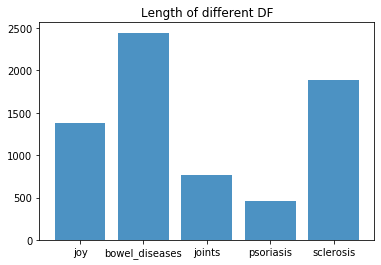

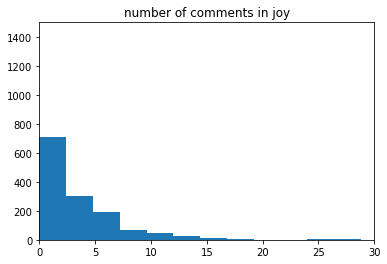

In [262]:
table = [joy,bowel_diseases,joints,psoriasis,sclerosis]
x = []
for df in table:
    x.append(df.shape[0])
y=['joy','bowel_diseases','joints','psoriasis','sclerosis']
plt.bar(y, x, align='center', alpha=0.8)
plt.title("Length of different DF")
plt.show()

def hist_comment(df,name_DF):
    save = df['number_comment'].tolist()
    save = list(map(int, save))
    plt.hist(save,bins=30)
    plt.axis([0, 30, 0, 1500])
    plt.title('number of comments in '+name_DF)
    plt.show()
    # TODO: Can you make the graph look prettier? I get in trouble with that
#hist_comment(psoriasis)
hist_comment(joy,'joy')

In [263]:
def split_DF_to_word(df):
    #Gets DF and returns a list of the words from all columns and rows
    #Preparing to graph: plot_20_common
    dim = df.shape
    all_words = []
    for i in range(0,dim[0]):
        if i % 100 == 0:
            print('#',i)
        for j in range(4,dim[1]):
            dat = df.iloc[i,j]
            if not isNaN(dat):
                temp = dat.split()
                all_words = all_words + temp
            else:
                break
    return all_words

def clean_stop_word(lst,stop = ''):
    if len(stop) == 0:
        stop = list(pd.read_csv('heb_stopwords.txt', sep='\n', header=None)[0])
    temp = []
    for word in lst:
        if word not in stop:
            temp.append(word)
    return temp
temp = split_DF_to_word(joy)
temp = clean_stop_word(temp)

# 0
# 100
# 200
# 300
# 400
# 500
# 600
# 700
# 800
# 900
# 1000
# 1100
# 1200
# 1300


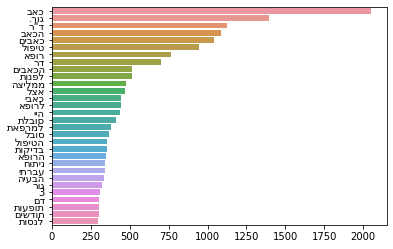

In [274]:
def invert_words_list(words_list):
    #Reverses the direction of the words so that the graphs in Hebrew will be readable
    return [word[::-1] for word in words_list]

def plot_common(words, n=20):
    #Gets text divided into tokens, pulls out a graph
    word_count = Counter(words)
    most=word_count.most_common(n)
    x, y= zip(*most)
    sns.barplot(x=y,y=invert_words_list(x))

plot_common(temp, 30)

In [78]:
def invert_word(word):
    #Reverses the direction of the words so that the graphs in Hebrew will be readable
    return ' '.join([w[::-1] for w in word.split()][::-1])

'םולש'

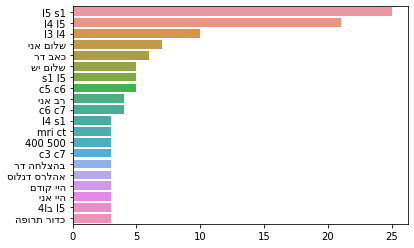

In [278]:
from langdetect import detect
def plot_top_ngrams_barchart(text, n=2):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:20]
    x,y=map(list,zip(*words_freq))
    temp = []
    for pair in x:
        heb_words = 0
        words = pair.split()
        for i in [0,1]:
            if not words[i].isnumeric() and detect(words[i]) == 'he': 
                heb_words += 1
                words[i] = invert_word(words[i])
        if heb_words == 2:
            words = words[::-1]
        temp.append(' '.join(words))
    sns.barplot(x=y,y=temp)



plot_top_ngrams_barchart(temp,n=2)
#TODO: well, do you know how to make a graph, not to be one on another?


In [363]:
#TODO: בשוקה 86 הוא לא מטפל במקרים. אני חושב שזה בגלל שמופיע לפני נקודה. יתכן שכדי לשנות את הפונקציה של הנקיון. פתרון אלגני יותר יהיה להתשמש ברגקס
print(joy1.iloc[252  ,5])
print('##############################################')
print(joy.iloc[252  ,5])
print('##############################################')


<strong><em>במסגרת עבודת תזה אנו עורכים מחקר שמטרתו להבין גורמים למוטיבציה ולשחיקה בקרב בני זוג של חולים בכאב כרוני. בעזרת מילוי שאלון האורך כ-25 דקות (המצורף בקישור למטה), תוכלו לעזור לשפר את הידע הקיים בנושא ואולי בהמשך לשפר את הטיפול הניתן הן לחולים הסובלים מכאב כרוני והן לכם/ן, בני/בנות הזוג המטפלים/ות בהם.</em></strong><br />
<br />
<strong><em>הקישור למחקר:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp

### future functions

In [364]:
def return_phd(cell):
#Looking in the comments who of the writers is a PhD
#return
    cell = cell.split(',')
    save = []
    for i,name in enumerate(cell):
        temp = re.sub(r'[^\w]', ' ', name)
        if "ד ר" in temp or "PhD" in temp:
            save.append(i)
            print(i)
    return save

